In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/625.1 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 245.8/625.1 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB 7.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.7 MB 6.8 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.7 MB 3.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.7 MB 3.9 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.7 MB 3.1 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 4.1 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.7 MB 4.0 MB/s eta 0:00:01
   -------------

In [3]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Data Science assignment\Timeseries\Timeseries\exchange_rate.csv")

In [5]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


## EDA

In [8]:
df.shape

(7588, 2)

In [9]:
df.isnull().sum()


date       0
Ex_rate    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [12]:
df.describe()


,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


## Data Preprocessing

In [13]:
#Changing the data type of Date column as Date using pandas command
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

In [14]:
#Changing the Date columns as the index column of the dataset and also displaying the first five records of the dataset
df.set_index('date',inplace = True)

## Visualization

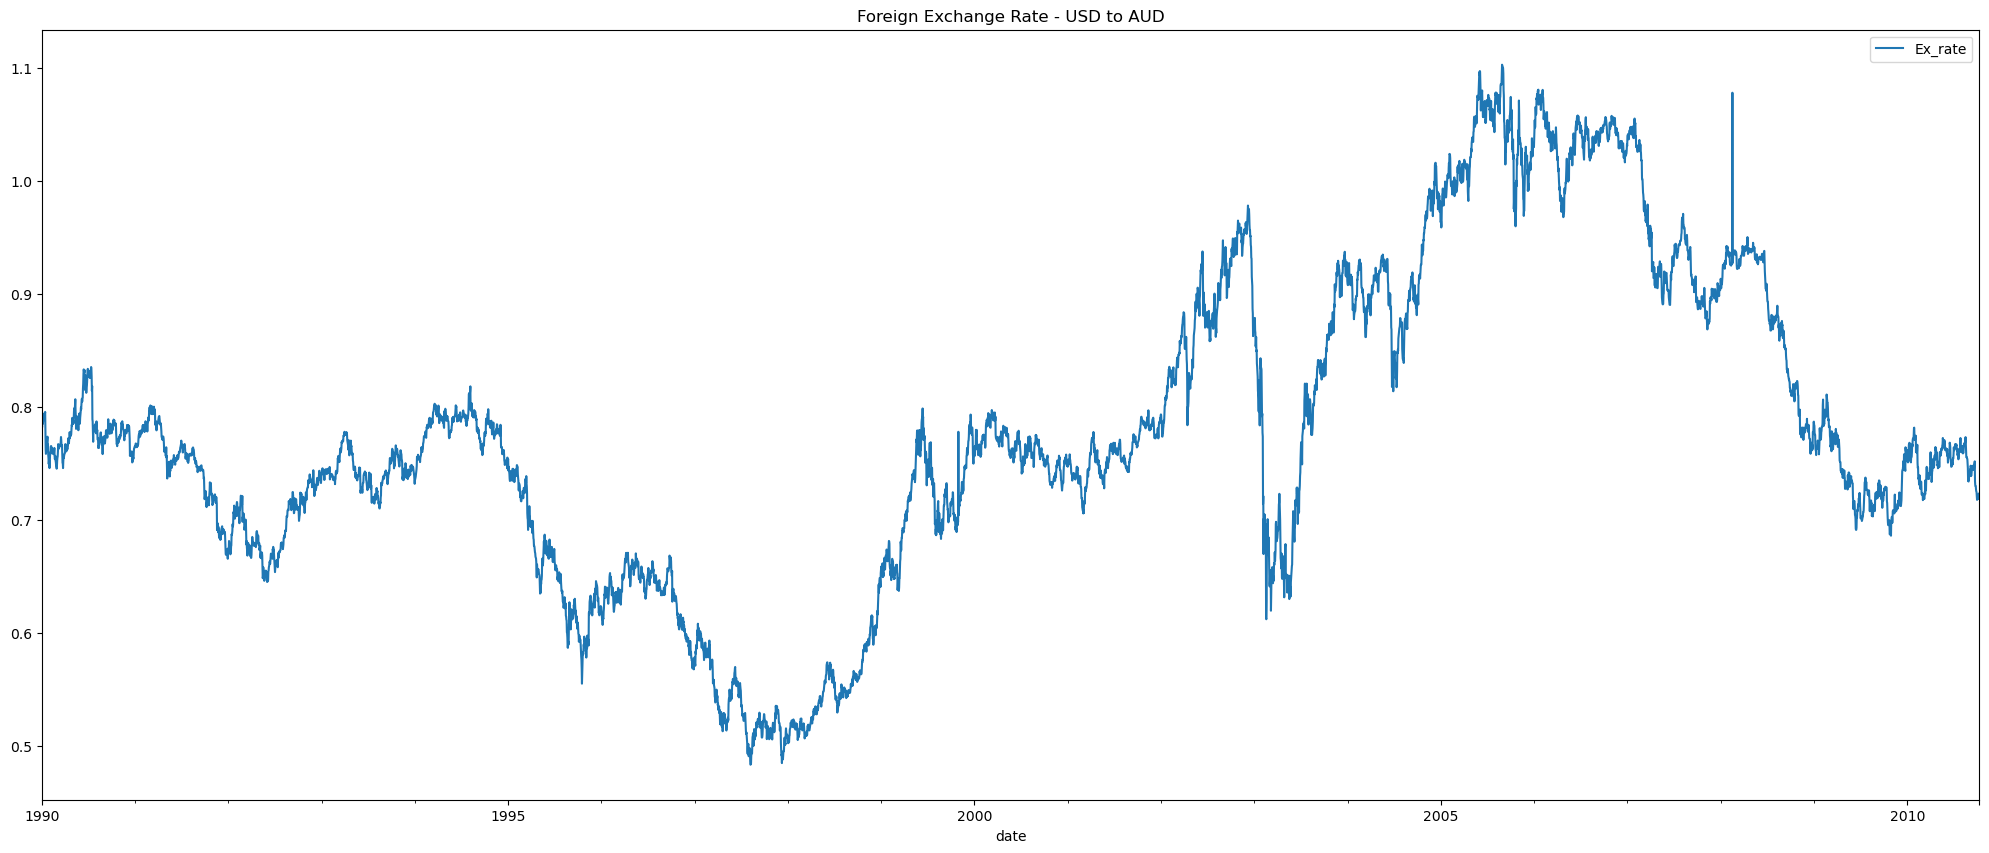

In [15]:
#Plotting the line graph to show the data trend in the dataset 

df.plot(figsize = (25,10))
plt.title('Foreign Exchange Rate - USD to AUD')
plt.savefig('Foreign Exchange Rate - USD to AUD.png')
plt.show()

In [16]:
#Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to
#fit or predict the model. And along with that showing number of observation after resampling and displaying the first five
#record of resampled dataset

In [17]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  1084


,Ex_rate
date,
1990-01-07,0.785729
1990-01-14,0.792714
1990-01-21,0.764871
1990-01-28,0.762429
1990-02-04,0.753529


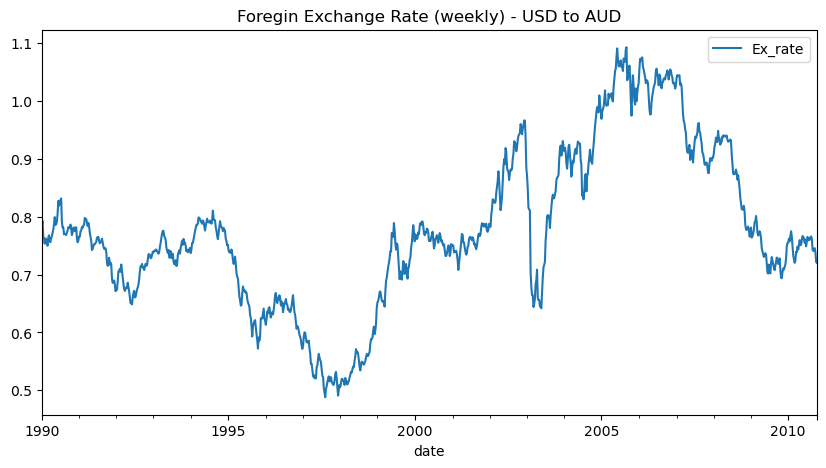

In [18]:
#Plotting the line graph to show the data trend in the weekly resampled dataset 
df_week.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (weekly) - USD to AUD')
plt.show()

#### Resampling the dataset to monthly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset

In [19]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  250


,Ex_rate
date,
1990-01-31,0.773874
1990-02-28,0.757486
1990-03-31,0.760365
1990-04-30,0.770110
1990-05-31,0.789684


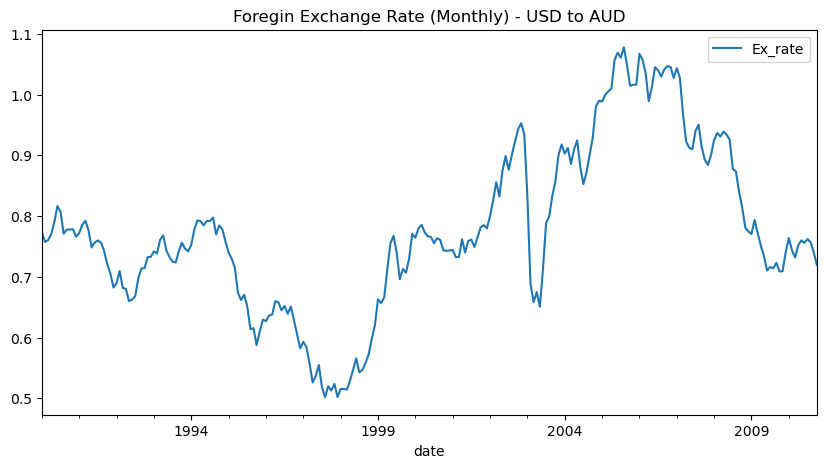

In [20]:
#Plotting the line graph to show the data trend in the monthly resampled dataset
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - USD to AUD')
plt.show()

#### Resampling the dataset to yearly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observation after resampling and displaying the first five record of resampled dataset

In [21]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  21


,Ex_rate
date,
1990-12-31,0.778996
1991-12-31,0.749830
1992-12-31,0.695201
1993-12-31,0.743442
1994-12-31,0.781024


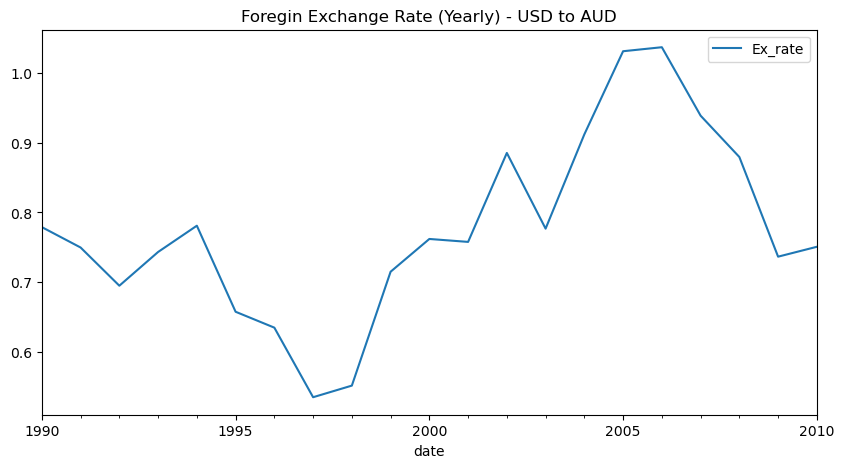

In [22]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - USD to AUD')
plt.show()

#### Plotting the scatter plot to show the data trend in the weekly resampled dataset. And by observing all the above resampled graph , weekly resampled data has more clear peak and perks among all resample data

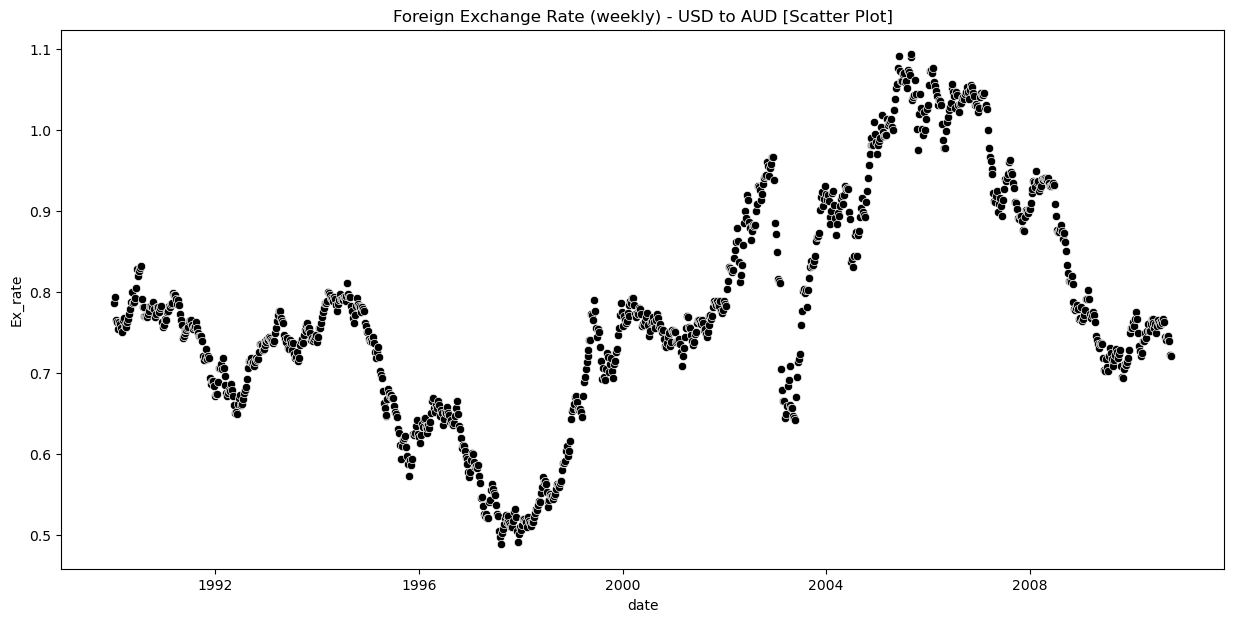

In [23]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df_week.index , y = df_week.Ex_rate , color = 'black')
plt.title('Foreign Exchange Rate (weekly) - USD to AUD [Scatter Plot]')
plt.show()

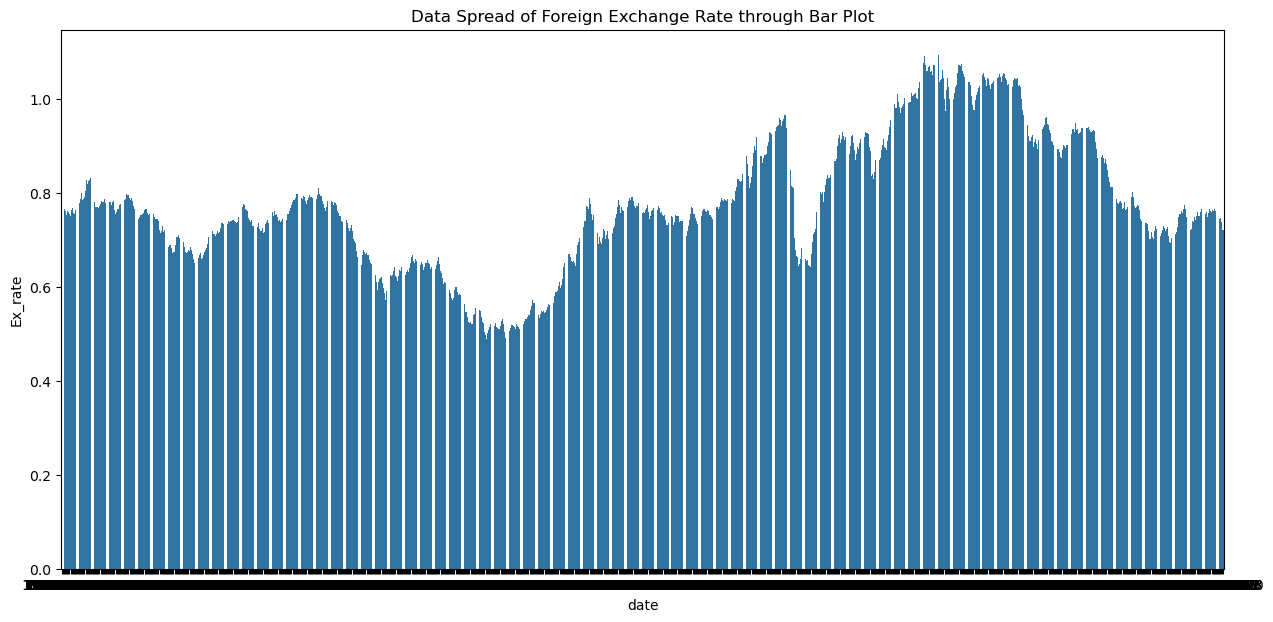

In [24]:
#Plotting the Bar plot using seaborn to show the data spread in the resampled weekly dataset
sns.barplot(data = df_week,x = df_week.index , y = df_week.Ex_rate)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.show()

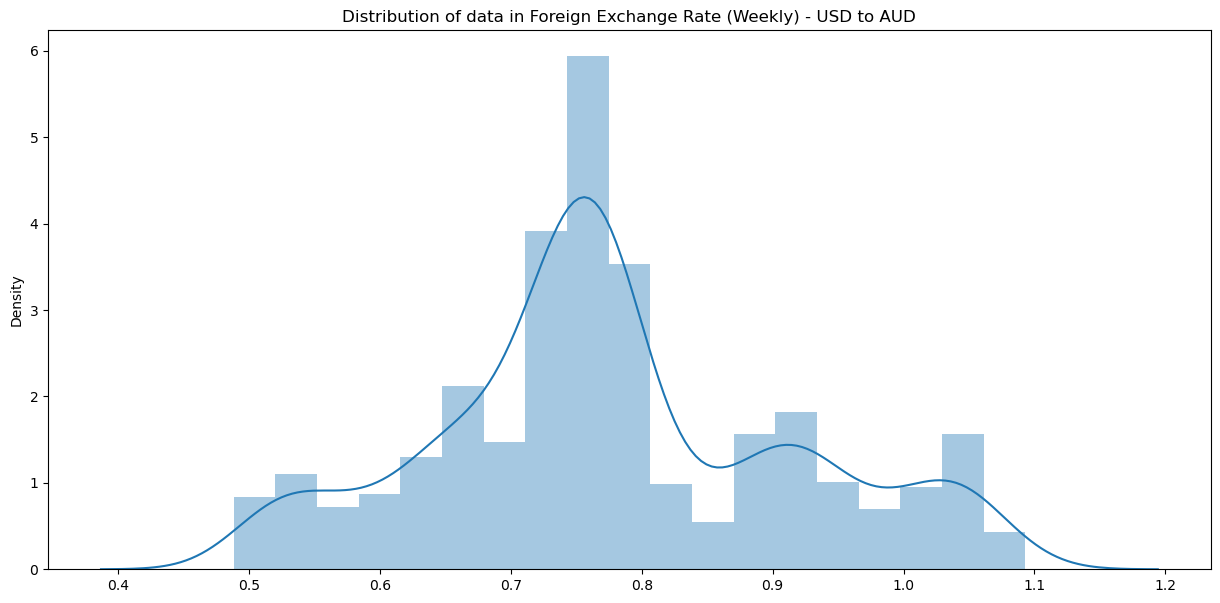

In [25]:
#Plotting the dist plot using seaborn to show the data distribution in the resampled weekly dataset.
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - USD to AUD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to USD.png')
plt.show()

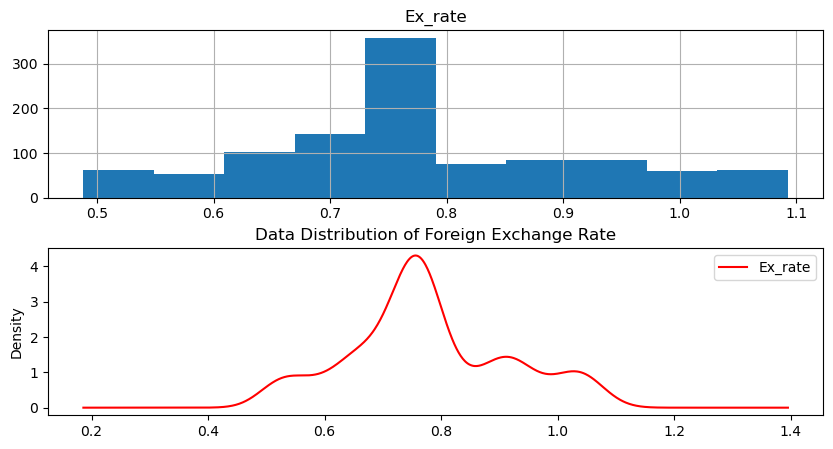

In [26]:
#Plotting the histogram and KDE line graph to show the distribution of data in the dataset.
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

In [27]:
#Plotting the graph with Seasonal Decomposition function to show the data discription ,trend , seasonal , residuals


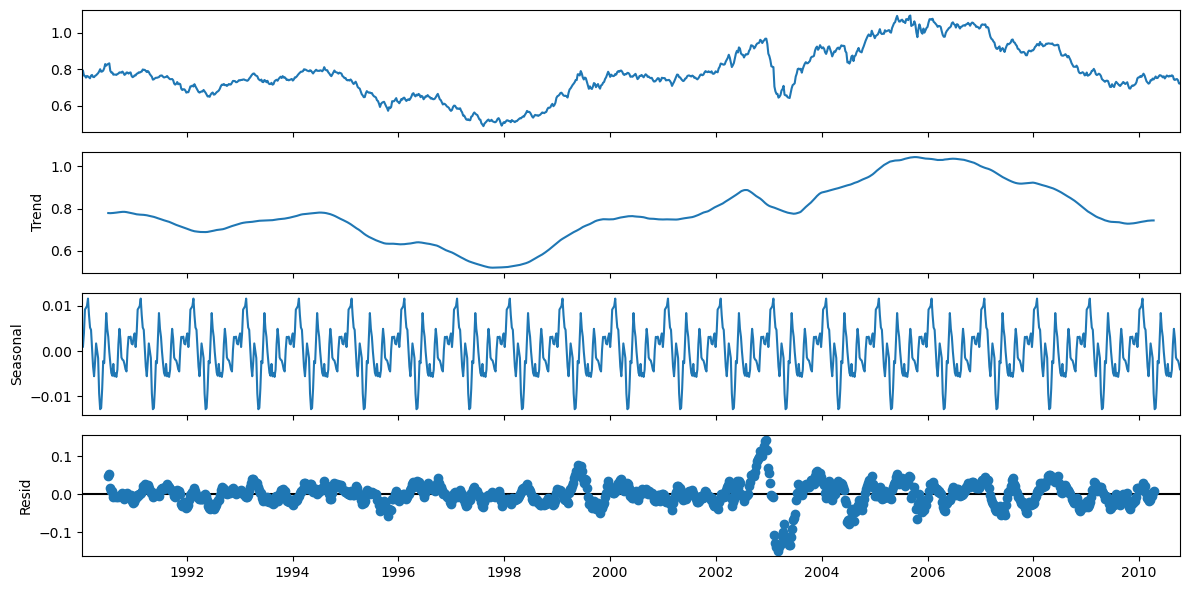

In [28]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week.fillna(method='bfill'), period = 52 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

In [29]:
#Plotting the graph with Partial Autocorrelation and Auto Correleation of the data from the dataset and saving the graph as PNG file


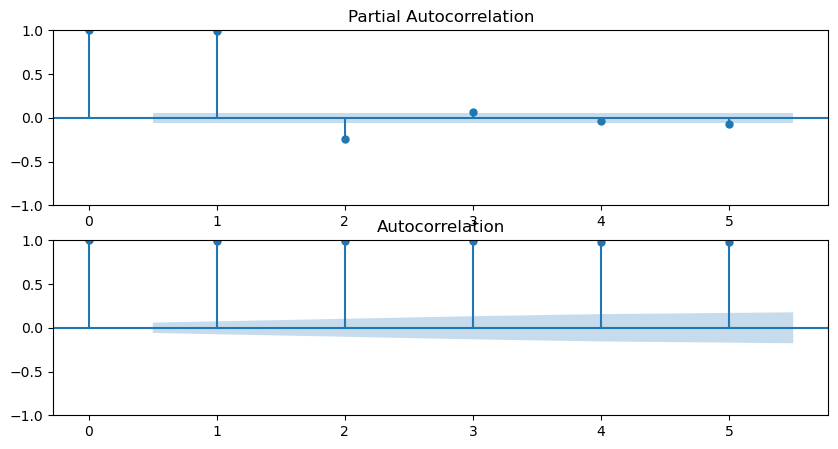

In [30]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

### Data Transformation

In [31]:
'''
The adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.
'''

'\nThe adf_check() function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.\n'

In [32]:
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Ex_rate    0
dtype: int64


In [33]:
# Check for infinite values
infinite_values = np.isinf(df_week).sum()
print(infinite_values)

Ex_rate    0
dtype: int64


In [34]:
# Remove rows with missing values
df_week = df_week.dropna()

In [35]:
# Check for missing values
missing_values = df_week.isnull().sum()
print(missing_values)

Ex_rate    0
dtype: int64


In [36]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

### Performing the Augmented Dickey Fuller Test on the original data in the resampled weekly dataset to find whether the time series is a stationary or not

In [37]:
adf_check(df_week)

Test Statistic                   -1.800054
p-value                           0.380435
Number of Lags Used               4.000000
Number of Observations Used    1079.000000
Critical Value (1%)              -3.436425
Critical Value (5%)              -2.864222
Critical Value (10%)             -2.568198
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


##### Since the time series is not a stationary , the resampled weekly dataset is transformed as a new dataframe with first difference to make it as a stationary series Along with that showing number of observation in the new dataframe and displaying the first five record of the new data frame

In [38]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 1083


,Ex_rate
date,
1990-01-14,0.006986
1990-01-21,-0.027843
1990-01-28,-0.002443
1990-02-04,-0.008900
1990-02-11,0.009114


#### Performing the Augmented Dickey Fuller Test on the new transformed data in the resampled weekly dataset to find whether the time series is a stationary or not

In [40]:
adf_check(df1_week)

Test Statistic                -1.434209e+01
p-value                        1.055846e-26
Number of Lags Used            3.000000e+00
Number of Observations Used    1.079000e+03
Critical Value (1%)           -3.436425e+00
Critical Value (5%)           -2.864222e+00
Critical Value (10%)          -2.568198e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


In [41]:
#Plotting the line graph to show the data trend in the transformed data from the resampled weekly dataset and saving the graph as PNG File


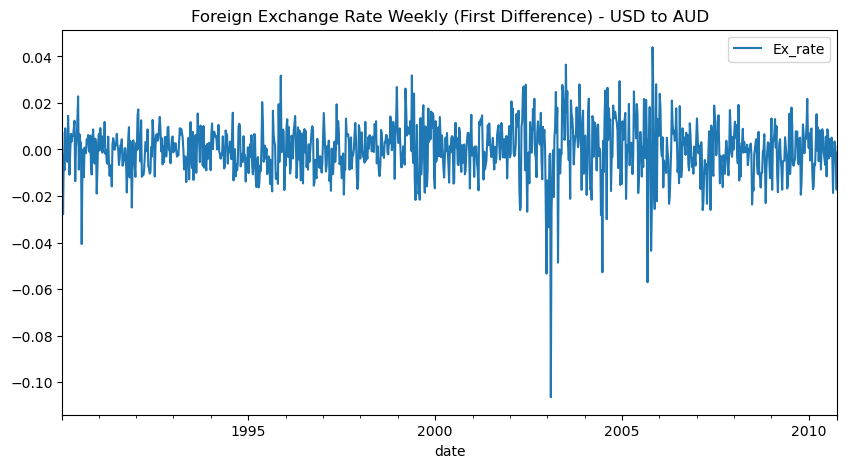

In [42]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - USD to AUD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference) - USD to AUD.png')
plt.show()

#### Plotting the graph with pandas auto correlation plot to show the difference between the stationary data and non - stationary data and saving it as png file.

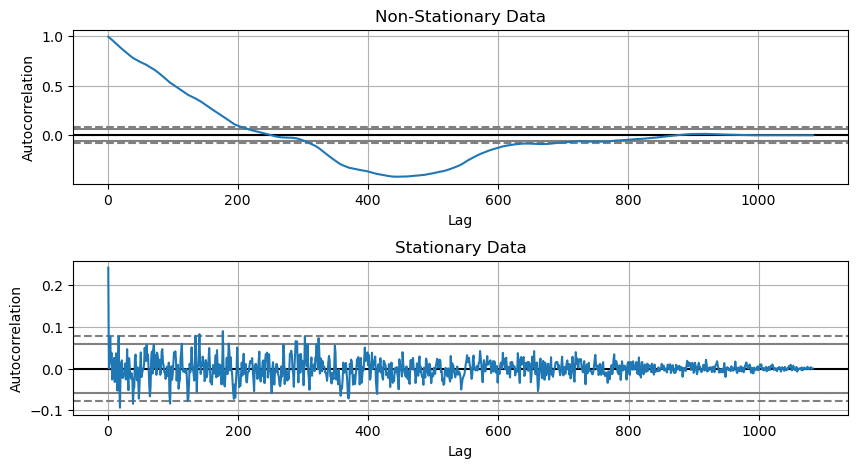

In [43]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

# Model Fitting

### Getting the p value and q value for the model fitting using auto_arima function by passing through some needed parameters , the best model is evaluated by least Akaike Information Criterion (AIC)

In [44]:
model = auto_arima(df_week , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6685.063, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6624.331, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6687.232, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6691.370, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6626.300, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6689.294, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6689.240, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6687.279, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6693.352, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6691.277, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6691.222, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6689.215, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6689.262, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.113 seconds


#### Defining the summary of the model fitted with auto_arima function , here getting various information such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) , Hannan-Quinn Information Criterion (HQIC), L og Likelihood etc. From which we can evaluate the model

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1084
Model:               SARIMAX(0, 1, 1)   Log Likelihood                3348.676
Date:                Thu, 23 Oct 2025   AIC                          -6693.352
Time:                        12:08:24   BIC                          -6683.377
Sample:                    01-07-1990   HQIC                         -6689.575
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2606      0.026      9.968      0.000       0.209       0.312
sigma2         0.0001   2.14e-06     56.284      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4493.99
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model = ARIMA(df_week , order = (5,1,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 1084
Model:                 ARIMA(5, 1, 2)   Log Likelihood                3353.993
Date:                Thu, 23 Oct 2025   AIC                          -6691.985
Time:                        12:08:33   BIC                          -6652.086
Sample:                    01-07-1990   HQIC                         -6676.879
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2153      0.279      0.771      0.440      -0.332       0.762
ar.L2          0.6108      0.142      4.301      0.000       0.332       0.889
ar.L3         -0.1618      0.043     -3.725      0.000      -0.247      -0.077
ar.L4          0.1228      0.026      4.812      0.000       0.073       0.173
ar.L5         -0.0399      0.044     -0.899      0.368      -0.127       0.047
ma.L1          0.0474      0.271      0.175      0.861      -0.484       0.579
ma.L2         -0.6703      0.190     -3.533      0.000      -1.042      -0.298
sigma2         0.0001   2.84e-06     42.116      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3612.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

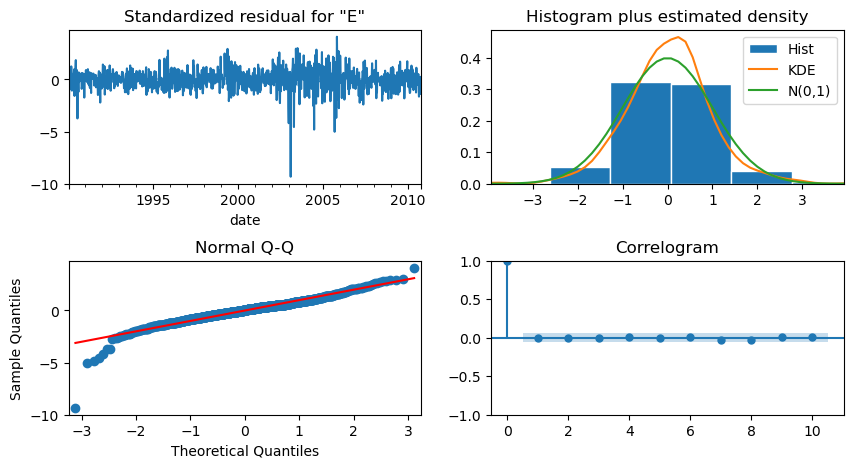

In [47]:
#Plotting the diagnostic plot for the fitted model to show the best fit of the model and saving it as png file
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [48]:
#Predicting the value using fitted model with whole resampled weekly data
predictions = result.predict(typ = 'levels')

## Model Evaluation

In [49]:
print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_week['Ex_rate'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_week['Ex_rate'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_week['Ex_rate'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_week['Ex_rate'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Ex_rate'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 96.30 % 

Mean Squared Error :  0.0006889725536951866 

Mean Absolute Error :  0.008661432558293838 

Root Mean Squared Error :  0.02624828668113762 

Mean Absolute Percentage Error : 1.13 %


## Result

In [50]:
Final_data = pd.concat([df_week,df1_week,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (USD to AUD).csv')
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
date,,,
1990-01-07,0.785729,NaN,0.000000
1990-01-14,0.792714,0.006986,0.785729
1990-01-21,0.764871,-0.027843,0.794412
1990-01-28,0.762429,-0.002443,0.757272
1990-02-04,0.753529,-0.008900,0.763946


### Model Testing

In [51]:
#Splliting the Resampled Weekly Dataset into training data and test data. Displaying the number of observations in both training data and test data.

In [52]:
size = int(len(df_week)*0.80)
train , test = df_week[0:size]['Ex_rate'] , df_week[size:(len(df_week))]['Ex_rate']
print('Counts of Train Data : ',train.shape[0])
print('Counts of Train Data : ',test.shape[0])

Counts of Train Data :  867
Counts of Train Data :  217


In [53]:
train_values = [x for x in train]
prediction = []
print('Printing Predictied vs Expected Values....')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values , order = (0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    prediction.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('Predicted = %f , Actual = %f' % (pred_out , test_in))

Printing Predictied vs Expected Values....


Predicted = 1.020466 , Actual = 1.031167
Predicted = 1.033863 , Actual = 1.033182
Predicted = 1.033011 , Actual = 1.038432
Predicted = 1.039798 , Actual = 1.039574
Predicted = 1.039517 , Actual = 1.037241
Predicted = 1.036668 , Actual = 1.044465
Predicted = 1.046428 , Actual = 1.046676
Predicted = 1.046738 , Actual = 1.052859
Predicted = 1.054400 , Actual = 1.046291
Predicted = 1.044253 , Actual = 1.037256
Predicted = 1.035495 , Actual = 1.048507
Predicted = 1.051772 , Actual = 1.054639
Predicted = 1.055358 , Actual = 1.052527
Predicted = 1.051816 , Actual = 1.044990
Predicted = 1.043273 , Actual = 1.041232
Predicted = 1.040719 , Actual = 1.030797
Predicted = 1.028299 , Actual = 1.032021
Predicted = 1.032956 , Actual = 1.028472
Predicted = 1.027345 , Actual = 1.021559
Predicted = 1.020104 , Actual = 1.026367
Predicted = 1.027940 , Actual = 1.039732
Predicted = 1.042701 , Actual = 1.044737
Predicted = 1.045250 , Actual = 1.043060
Predicted = 

### Holt Method

In [54]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [55]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [56]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
print(MAPE(pred_ses,test))
rmse = np.sqrt(np.mean((np.array(test)-np.array((pred_ses)))**2))
rmse

23.7309127765684


0.21357792233404413

In [57]:
pred_ses

2006-08-20    1.033381
2006-08-27    1.033381
2006-09-03    1.033381
2006-09-10    1.033381
2006-09-17    1.033381
                ...   
2010-09-12    1.033381
2010-09-19    1.033381
2010-09-26    1.033381
2010-10-03    1.033381
2010-10-10    1.033381
Freq: W-SUN, Length: 217, dtype: float64

In [58]:
# Holt method
hw_model = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
print(MAPE(pred_hw,test))
rmse = np.sqrt(np.mean((np.array(test)-np.array((pred_hw)))**2))
rmse

12.831936973718365


0.12455215594530507

#### Evaluating the model with the following metrics such as percentage of r2 score , mean squared error , root mean squared error , mean absolute error and mean absolute percentage error for the predicted value and test data.

In [59]:
print('Evaluation Result for Test data : ','\n')
print('R2 Score for Test data : {0:.2f} %'.format(100*r2_score(test,prediction)),'\n')
print('Mean Squared Error : ',mean_squared_error(test,prediction),'\n')
print('Mean Absolute Error : ',mean_absolute_error(test,prediction),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(test,prediction)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,prediction)))

Evaluation Result for Test data :  

R2 Score for Test data : 99.34 % 

Mean Squared Error :  7.930221816083045e-05 

Mean Absolute Error :  0.006992659439680327 

Root Mean Squared Error :  0.008905179288528135 

Mean Absolute Percentage Error : 0.84 %


In [60]:
predictions_df = pd.Series(prediction, index = test.index)

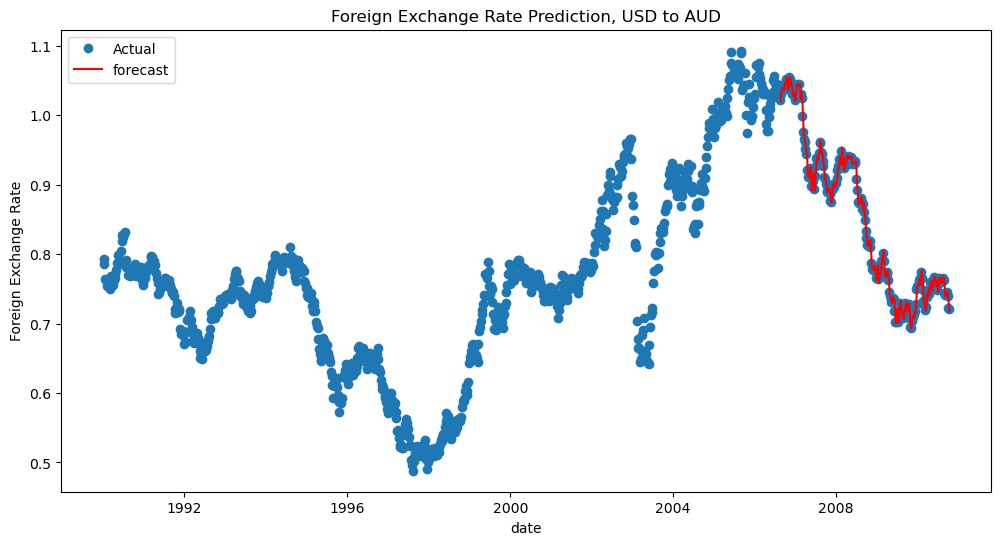

In [61]:
#Plotting the graph with predicted data and resampled weekly data index since the prediction is based on test data.

plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, USD to AUD', xlabel='date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction - USD to AUD.png')